# Autoencoders

## Autoencoders Brief

Autoencoders are a type of neural network designed to learn efficient codings of input data. They work by compressing the input into a latent-space representation and then reconstructing the output from this representation. This process involves two main parts: the encoder $ f $ and the decoder $ g $. The encoder maps the input $ x $ to an internal representation or code $ h $, while the decoder maps this code $ h $ back to the output $ r $, which is a reconstruction of the original input.

![AE_GraphNet1](../ML_Image/GraphicalOperationofAE.PNG)

To further clarify latent space $ h $, we can use the concept of **Efficient Data Representations**. Consider two sequences: one random and one with a clear pattern (38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16). Despite the first sequence being shorter, the second sequence is easier to memorize because it follows a recognizable pattern of decreasing even numbers. This illustrates why autoencoders are designed to extract and encode such patterns from the input data into the latent space during training.

***Performing PCA with an Undercomplete Linear Autoencoder***
If the autoencoder uses only linear activations and the cost function is the mean squared error (MSE), then it ends up performing Principal Component Analysis.

### Structure of Autoencoders

1. **Encoder**: The encoder compresses the input data into a latent-space representation, reducing its dimensionality. It consists of one or more layers that progressively reduce the size of the input.

2. **Latent Space**: The compressed representation of the input data, also known as the bottleneck. This part of the network contains the most crucial information needed to reconstruct the original input.

3. **Decoder**: The decoder reconstructs the input data from the latent representation. It consists of one or more layers that progressively increase the size of the data back to the original input dimensions.

### AE formulation

The encoder can generally be described as a function $ g $ that depends on certain parameters, denoted as $ h_i = g(x_i) $, where $ h_i \in \mathbb{R}^q $ represents the latent feature extracted by the encoder block when applied to the input $ x_i $. Here, the function $ g $ maps from $ \mathbb{R}^n $ to $ \mathbb{R}^q $.

The decoder, which produces the network's output denoted by $ \tilde{x}_i $, is then a function $ f $ of the latent features: $ \tilde{x}_i = f(h_i) = f(g(x_i)) $, where $ \tilde{x}_i \in \mathbb{R}^n $.

Training an autoencoder involves finding the functions $ g(·) $ and $ f(·) $ that minimize the difference between the input and output, which is captured by a loss function $ \Delta(x_i, \tilde{x}_i) $. This loss function penalizes discrepancies between the input $ x_i $ and the reconstructed output $ \tilde{x}_i $, and the goal is to minimize this loss across all observations.

To avoid an autoencoder learning the identity function, strategies such as applying regularization are used to ensure more meaningful feature learning.

**Regularization in Autoencoders**

Regularization often involves enforcing sparsity in the latent features. A common approach is to include an $\ell_1$ or $\ell_2$ regularization term in the loss function. For $\ell_2$ regularization, the objective is:

$$
\argmin_{f, g} \left( \Delta(x_i, \tilde{x}_i) + \lambda \|g(x_i)\|_2^2 \right)
$$

Here, $\Delta(x_i, \tilde{x}_i)$ represents the loss function measuring the difference between the input $x_i$ and the output $\tilde{x}_i$, and $\|g(x_i)\|_2^2$ is the $\ell_2$ norm of the latent features with $\lambda$ as the regularization parameter. The parameters $\theta_i$ in the functions $f(·)$ and $g(·)$ are typically the weights in neural networks.

## Define Architecture

There are three key parts of a neural network’s architecture:
- input, body , output

![AE_Structure1](../ML_Image/AE_structure.PNG)

### Guide for Showing Architecture

1. Install Graphviz and pydot.
2. If you encounter an error while plotting, download Graphviz from [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/), then extract the files and add the directory to your system's PATH. For example, if you extract the files to "Program Files," add the following path:
   ```
   C:\Program Files\Graphviz-12.0.0-win64\bin
   ```
3. After setting up the PATH, check the following code. The output should be:
   ```
   pydot and Graphviz are properly installed.
   ```

In [1]:
import pydot
from tensorflow.keras.utils import plot_model

def check_graphviz():
    try:
        pydot.Dot.create(pydot.Dot())
        print("pydot and Graphviz are properly installed.")
    except Exception as e:
        print(f"An error occurred: {e}")

check_graphviz()

pydot and Graphviz are properly installed.


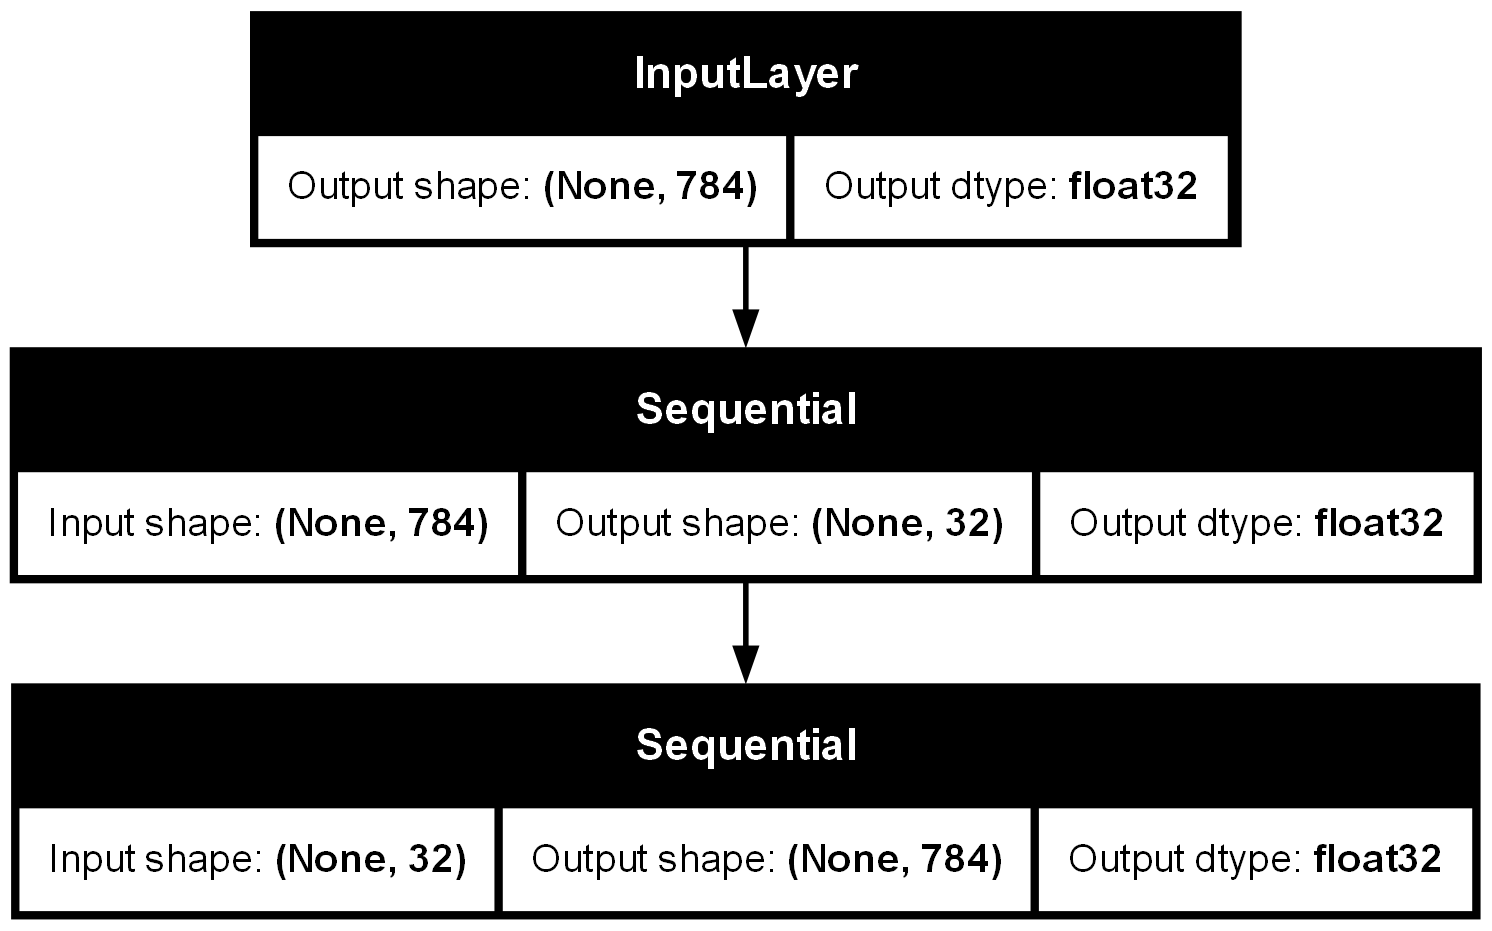

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import os

# Define Encoder
encoder = Sequential(name='encoder')
encoder.add(Input(shape=(784,)))
encoder.add(Dense(256, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(32, activation='relu'))

# Define Decoder
decoder = Sequential(name='decoder')
decoder.add(Input(shape=(32,)))
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))

# Define Full Autoencoder Model
# Note: Use Functional API to connect encoder and decoder
input_layer = Input(shape=(784,))
encoded = encoder(input_layer)
decoded = decoder(encoded)
model = Model(inputs=input_layer, outputs=decoded)
plot_model(model, show_shapes=True, show_dtype=True)



### Latent features in handwritten digits 
Latent features in handwritten digits, such as the number and angle of lines needed to form each digit, encapsulate essential information that does not rely on the gray values of each pixel in an image. Humans learn to write by understanding these fundamental components rather than focusing on pixel-level details.

![Latent features in handwritten digits1](../ML_Image/LatentFeatureHandwrittenDigit.PNG)


## Example : Denoising MNIST using AE

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.3960 - val_loss: 0.1445
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2014 - val_loss: 0.1111
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1793 - val_loss: 0.1016
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1716 - val_loss: 0.0932
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1639 - val_loss: 0.0875
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1602 - val_loss: 0.0845
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1569 - val_loss: 0.0814
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1550 - val_loss: 0.0794
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1530 - val_loss: 0.0776
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1517 - val_loss: 0.0765
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1500 - val_loss: 0.0756
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1500 - v

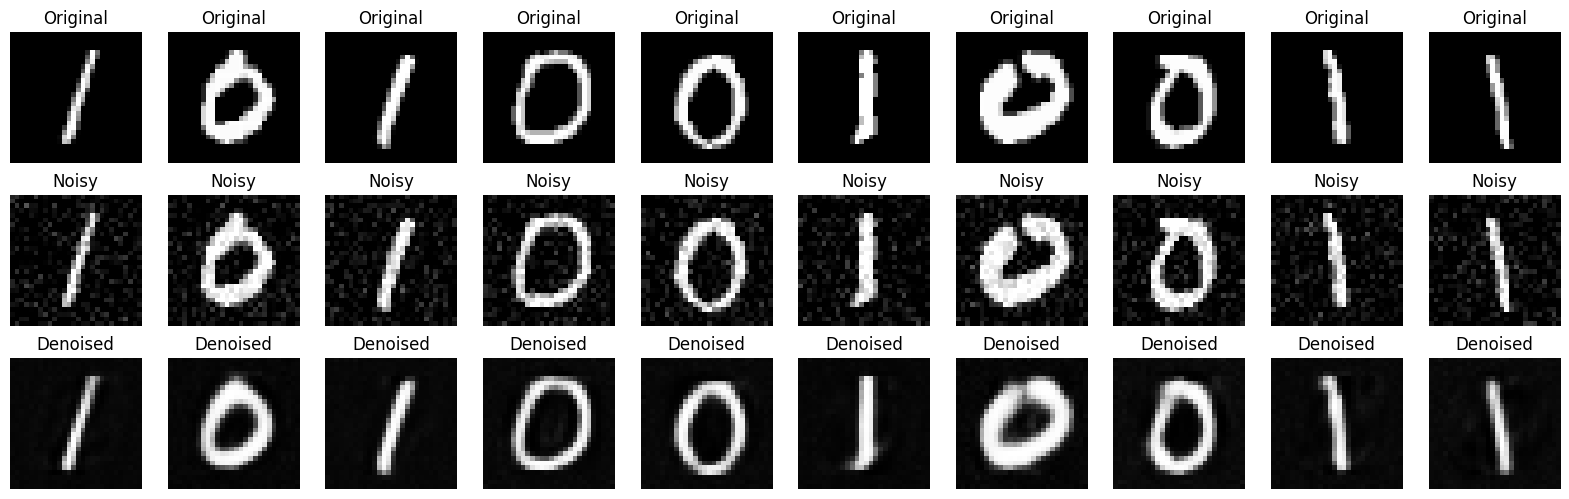

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.layers as L
from keras.models import Sequential

# Load the MNIST dataset from a local .npz file
mnist_data = np.load('mnist.npz')

# Extract the training and test sets
x_train = mnist_data['x_train']
y_train = mnist_data['y_train']
x_test = mnist_data['x_test']
y_test = mnist_data['y_test']

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Filter the dataset to include only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Generate noisy versions of the training data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# Combine clean and noisy training data
x_train_combined = np.concatenate([x_train, x_train_noisy])

# Define the Autoencoder model
encoder = Sequential(name='encoder')
encoder.add(L.Input((784,)))
encoder.add(L.Dense(256, activation='relu'))
encoder.add(L.Dense(64, activation='relu'))
encoder.add(L.Dense(32, activation='relu'))

decoder = Sequential(name='decoder')
decoder.add(L.Input((32,)))
decoder.add(L.Dense(64, activation='relu'))
decoder.add(L.Dense(256, activation='relu'))
decoder.add(L.Dense(784, activation='sigmoid'))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder on the combined data
autoencoder.fit(x_train_combined, x_train_combined, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Add noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise the test data
x_test_denoised = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


### Test Only

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


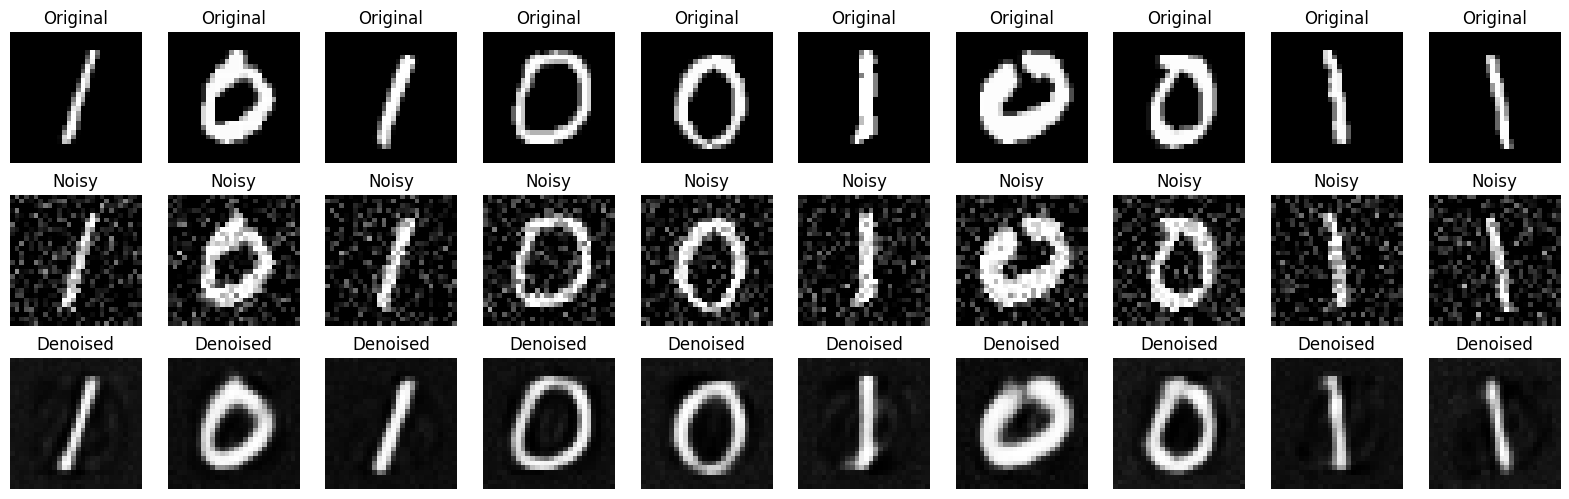

In [4]:
noise_factor=0.2
# Add noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise the test data
x_test_denoised = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


## Denoising with AE

### General Algorithm for Denoising Images Using an Autoencoder

**Load and Preprocess the Data**
- Load the dataset containing the images. This can be any image dataset, not limited to MNIST.
- Convert the images to grayscale (if necessary) and resize them to a consistent size.
- Normalize the pixel values to be between 0 and 1 by dividing by 255.

**Prepare Noisy and Clean Data**
- Create noisy versions of the images by adding Gaussian noise with varying noise levels.
- Combine the noisy images with the original (clean) images to create training data pairs: `(noisy_image, clean_image)`.

**Define the Autoencoder Architecture**
- **Encoder**: The encoder should reduce the dimensionality of the input images by passing them through several Dense or Convolutional layers with ReLU activation. The output of the encoder is a latent representation of the input image.
- **Decoder**: The decoder should reconstruct the clean images from the latent representation by passing the latent space through several Dense or Convolutional layers with ReLU or sigmoid activation.

**Compile the Model**
- Compile the autoencoder model using an optimizer like Adam and a loss function such as binary crossentropy or mean squared error (MSE).

**Train the Autoencoder**
- Train the autoencoder using the pairs of noisy and clean images. Use a validation set for monitoring the model's performance during training.

**Evaluate the Model**
- After training, test the autoencoder on a separate set of noisy images to evaluate its performance.
- Predict the denoised images using the autoencoder and compare them with the clean images.

**Visualize the Results**
- Visualize a few examples of the original, noisy, and denoised images to qualitatively assess the model's performance.



Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3793 - val_loss: 0.1709
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2190 - val_loss: 0.1298
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1907 - val_loss: 0.1154
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1832 - val_loss: 0.1079
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1755 - val_loss: 0.0999
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1699 - val_loss: 0.0945
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1648 - val_loss: 0.0907
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1613 - val_loss: 0.0874
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1586 - val_loss: 0.0842
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1553 - val_loss: 0.0813
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1541 - val_loss: 0.0792
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.15

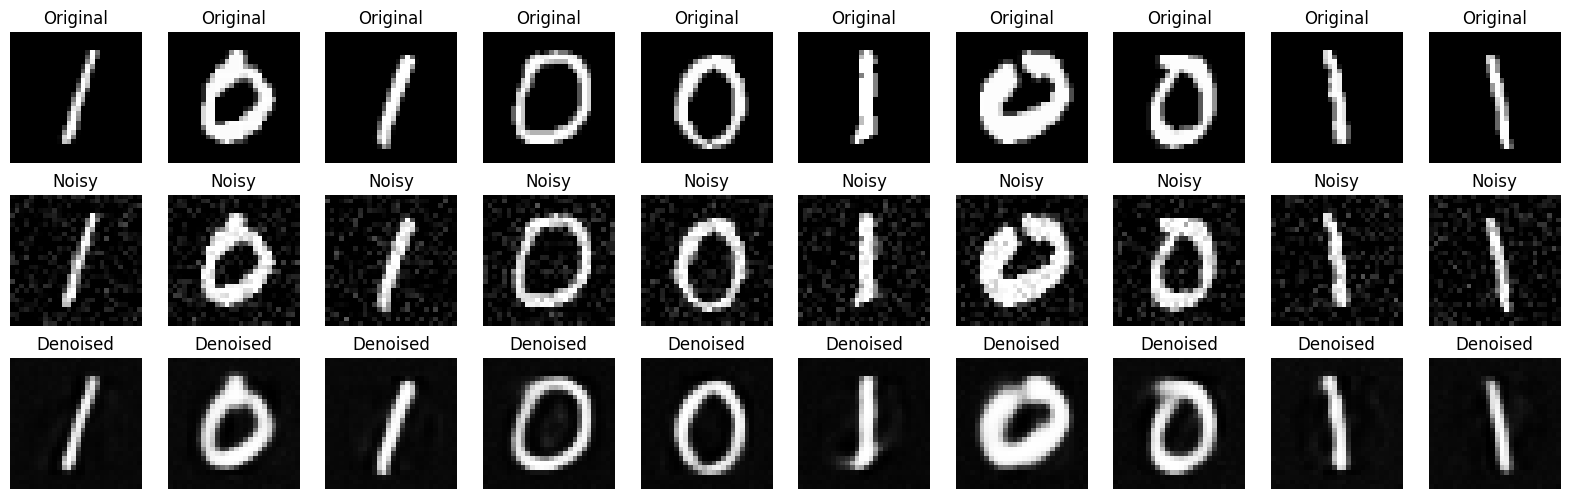

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.layers as L
from keras.models import Sequential



import tensorflow as tf

# Custom activation function 1: Example using sine
def custom_activation1(x):
    return tf.math.sin(x)

# Custom activation function 2: Example using softplus-like activation
def custom_activation2(x):
    return tf.math.log(1 + tf.exp(x))


# Load the MNIST dataset from a local .npz file
mnist_data = np.load('mnist.npz')

# Extract the training and test sets
x_train = mnist_data['x_train']
y_train = mnist_data['y_train']
x_test = mnist_data['x_test']
y_test = mnist_data['y_test']

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Filter the dataset to include only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Generate noisy versions of the training data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# Combine clean and noisy training data
x_train_combined = np.concatenate([x_train, x_train_noisy])

# Define the Autoencoder model with custom activations
encoder = Sequential(name='encoder')
encoder.add(L.Input((784,)))
encoder.add(L.Dense(256))
encoder.add(L.Lambda(custom_activation1))  # Use custom_activation1
encoder.add(L.Dense(64))
encoder.add(L.Lambda(custom_activation2))  # Use custom_activation2
encoder.add(L.Dense(32))
encoder.add(L.Lambda(custom_activation1))  # Use custom_activation1 again

decoder = Sequential(name='decoder')
decoder.add(L.Input((32,)))
decoder.add(L.Dense(64))
decoder.add(L.Lambda(custom_activation2))  # Use custom_activation2
decoder.add(L.Dense(256))
decoder.add(L.Lambda(custom_activation1))  # Use custom_activation1
decoder.add(L.Dense(784, activation='sigmoid'))  # Use sigmoid for the output layer

# Compile the Autoencoder model
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder on the combined data
autoencoder.fit(x_train_combined, x_train_combined, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Add noise to the test data
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoise the test data
x_test_denoised = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_denoised[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()


## Types of Autoencoders

### **Vanilla Autoencoders**:
The basic form of autoencoders, consisting of a simple encoder-decoder architecture with fully connected layers. it appeared above which is a specific type of feedforward neural networks where the input is the same as the output. 

![Vanilla_FFNN1](../ML_Image/Vanilla_FeedForwardNN.PNG)

#### Activation Function of the Output Layer

The **ReLU activation function** can assume all values in the range $[0, \infty)$. As a reminder, its formula is:

$$
\text{ReLU}(x) = \max(0, x)
$$

the input observations $x_i$. If the input $x_i$ be negative values, the ReLU might not be the optimal choice, as it outputs zero for all negative inputs, potentially leading to the problem of "dead neurons." In such cases, other activation functions, such as the **Leaky ReLU**, can be more suitable. The Leaky ReLU allows a small, non-zero gradient when the input is negative, defined as:

$$
\text{Leaky ReLU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

where $\alpha$ is a small constant, typically 0.01.

The **Sigmoid function** output of $\sigma(x)$ is in the range $(0, 1)$. Its formula is:

$$
\f(x) = \frac{1}{1 + e^{-x}}
$$

This function is useful when the output needs to be interpreted as a probability. However, it suffers from the vanishing gradient problem, making it less suitable for deep networks.

The **Hyperbolic Tangent (tanh)** function is another common activation function that scales the output to the range $[-1, 1]$:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

The tanh function is centered at zero, often leading to faster convergence during training compared to the sigmoid function.

The **ELU (Exponential Linear Unit)** is an activation function that tries to improve the ReLU by reducing the bias shift, which can occur during training. The formula for ELU is:

$$
\text{ELU}(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}
$$

where $\alpha$ is a positive constant, typically 1. ELU helps in learning faster and producing better accuracy in deep networks by smoothing the output for negative inputs.

The **Swish function**, developed by Google, is another activation function that has shown promising results. It is defined as:

$$
\text{Swish}(x) = \frac{x}{1 + e^{-x}} = x \cdot \f(x)
$$

Swish is a smooth, non-monotonic function that often performs better than ReLU in deep networks.

Finally, the **GELU (Gaussian Error Linear Unit)** is an activation function that applies a Gaussian distribution to the inputs, defined as:

$$
\text{GELU}(x) = x \cdot \Phi(x)
$$

where $\Phi(x)$ is the cumulative distribution function of the standard Gaussian distribution. GELU combines the benefits of ReLU and dropout, leading to improved performance in many deep learning tasks. It have some properties relative RELU suach as (No Dead Neurons, Smooth Gradient)
(**Dropout** is a regularization technique that randomly drops (sets to zero) a fraction of the neurons during training to prevent overfitting. It does this by forcing the network to learn more robust features and avoid relying too heavily on specific neurons.)


We mentioned to the **Softmax function** 
(Softmax function is generally not a good choice for an autoencoder's activation function) is typically used in the output layer of neural networks for multi-class classification problems. 
It converts the logits into probabilities that sum to 1, where each class's probability is given by:

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}
$$

This function is particularly useful when the model needs to predict multiple classes simultaneously.


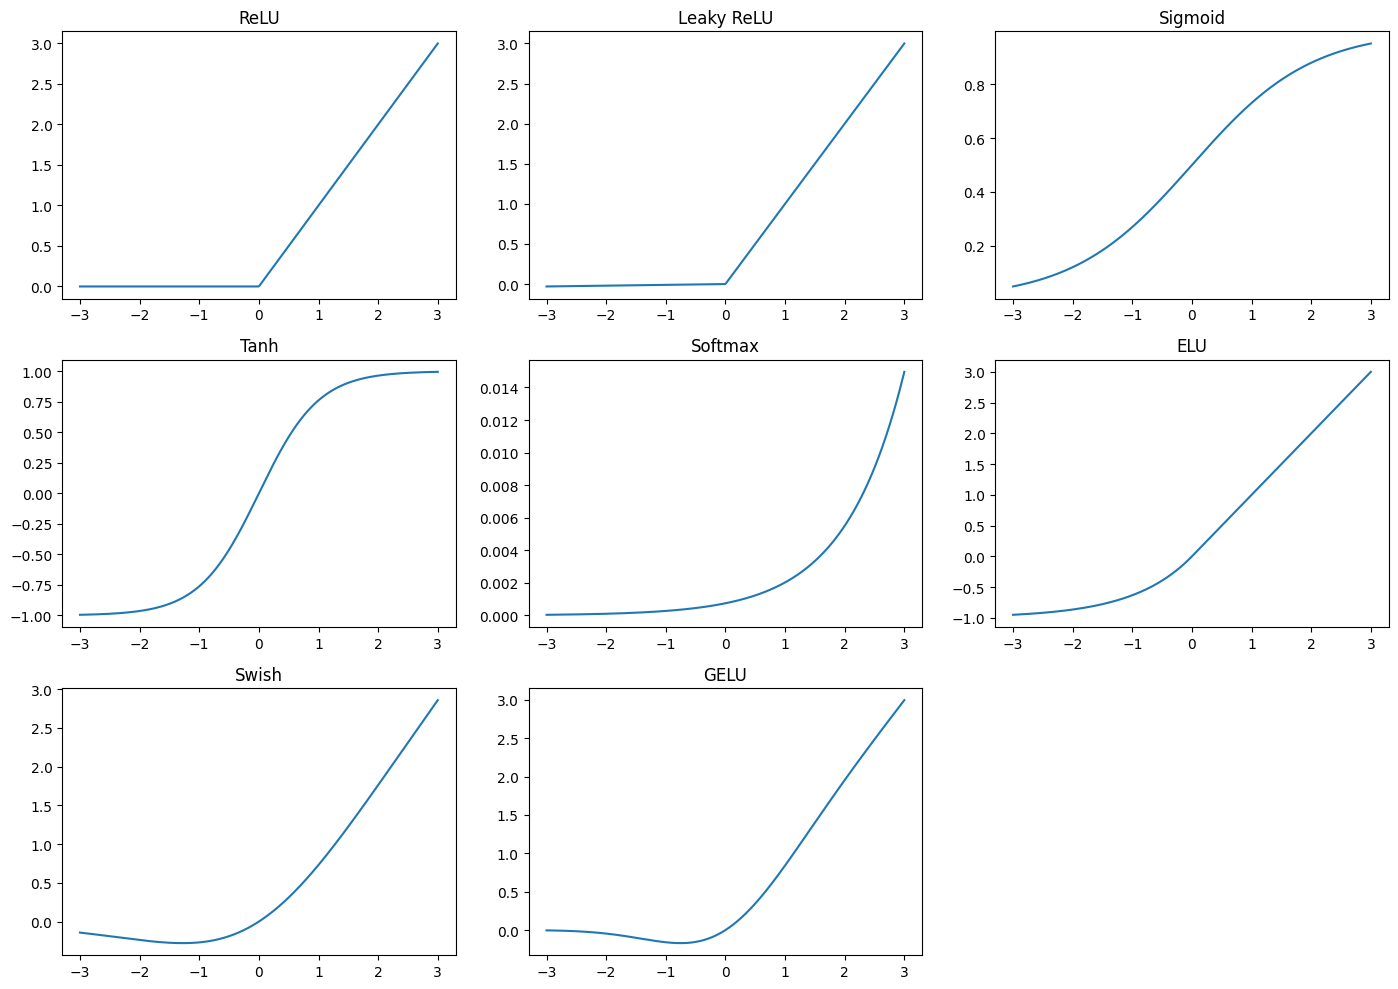

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / np.sum(e_x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x / (1 + np.exp(-x))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))))

# Generate input data
x = np.linspace(-3, 3, 400)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.plot(x, relu(x))
plt.title('ReLU')

plt.subplot(3, 3, 2)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU')

plt.subplot(3, 3, 3)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')

plt.subplot(3, 3, 4)
plt.plot(x, tanh(x))
plt.title('Tanh')

plt.subplot(3, 3, 5)
plt.plot(x, softmax(x))
plt.title('Softmax')

plt.subplot(3, 3, 6)
plt.plot(x, elu(x))
plt.title('ELU')

plt.subplot(3, 3, 7)
plt.plot(x, swish(x))
plt.title('Swish')

plt.subplot(3, 3, 8)
plt.plot(x, gelu(x))
plt.title('GELU')

plt.tight_layout()
plt.show()


#### Importance of $ f'(\xi)$ in Activation Functions

The derivative of an activation function, denoted as $f'(\xi)$, is crucial for several reasons in the context of neural networks:

**Gradient Computation**:
   - **Backpropagation**: The derivative $f'(\xi)$ is essential for backpropagation, the algorithm used to train neural networks. It helps compute the gradient of the loss function with respect to the weights of the network. This gradient is used to update the weights during training.
   - **Learning Dynamics**: The value of $ f'(\xi)$ determines how effectively the network learns. If $ f'(\xi)$ is too small (as in the case of saturated activation functions), gradients can vanish, making learning slow or ineffective. If $ f'(\xi)$ is too large, gradients can explode, leading to instability during training.

**Non-Linearity and Capacity**:
   - **Introducing Non-Linearity**: Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. The shape of $ f'(\xi)$ affects the non-linearity introduced by the activation function.
   
### Categorization of Activation Functions Based on $ f'(\xi)$

The categorization of activation functions based on their derivative behavior ($ f'(\xi)$) helps understand their suitability for different tasks:

- **Functions with $\lim_{\xi \to \infty} f'(\xi) = 0$**:
  - These functions have derivatives that approach zero for large $\xi$, indicating that the function saturates at high values. This saturation can prevent gradients from becoming excessively large but may also lead to vanishing gradients, making them less suitable for deep networks.

  - Examples:
    - **Sigmoid**: $ f(\xi) = \frac{1}{1 + \exp(-\xi)}$
    - **Hyperbolic Tangent (Tanh)**: $ f(\xi) = \tanh(\xi)$
    - **Logarithmic**: $ f(\xi) = \log(1 + \xi)$

- **Functions with $\lim_{\xi \to \infty} f'(\xi) = 1$**:
  - These functions have derivatives that approach 1 for large $\xi$, meaning their rate of change remains more consistent. This behavior helps in maintaining gradient flow during training and can be advantageous for avoiding vanishing gradients.

  - Examples:
    - **ReLU**: $ f(\xi) = \max(0, \xi)$
    



#### Activation Functions from Perspective of derivatives as $\xi $

Continuous scalar concave activation functions into two classes based on the behavior of their derivatives as $\xi \to \infty$: 

##### *Continuous Scalar Concave Activation Functions Satisfying $\lim_{\xi \to \infty} \sigma'(\xi) = 0$*

These functions have derivatives that approach zero as $\xi$ grows large, meaning their rate of change diminishes in the positive direction. They tend to saturate at large values of $\xi$. Examples include:

**Sigmoid Function**:

$$
\sigma(\xi) = \frac{1}{1 + \exp(-\xi)}
$$

- **Derivative**: $\sigma'(\xi) = \sigma(\xi)(1 - \sigma(\xi))$, which approaches 0 as $\xi \to \infty$ or $\xi \to -\infty$.

**Capped ReLU**:

$$
\sigma(\xi) = \min(\xi, \beta), \quad \beta > 0
$$

   - **Derivative**: $\sigma'(\xi) = 1$ for $0 \leq \xi \leq \beta$, and $0$ for $\xi > \beta$.

**Saturated Linear**:

$$
\sigma(\xi) = 
\begin{cases} 
1, & \text{if } \xi > 1 \\
\xi, & \text{if } 0 \leq \xi \leq 1 
\end{cases}
$$

   - **Derivative**: $\sigma'(\xi) = 1$ for $0 \leq \xi \leq 1$, and $0$ for $\xi > 1$.

**Inverse Square Root Unit**:

$$
\sigma(\xi) = \frac{\sqrt{\xi}}{1 + \xi^2}
$$

- **Derivative**: Approaches 0 as $\xi \to \infty$.

**Arctangent Function**:

$$
\sigma(\xi) = \frac{2}{\pi} \arctan(\xi)
$$

   - **Derivative**: $\sigma'(\xi) = \frac{2}{\pi} \cdot \frac{1}{1 + \xi^2}$, which approaches 0 as $\xi \to \infty$.

**Hyperbolic Tangent**:

$$
\sigma(\xi) = \tanh(\xi)
$$
   - **Derivative**: $\sigma'(\xi) = 1 - \tanh^2(\xi)$, which approaches 0 as $\xi \to \infty$.

**Inverse Hyperbolic Sine**:
   
$$
\sigma(\xi) = \text{arcsinh}(\xi)
$$

   - **Derivative**: $\sigma'(\xi) = \frac{1}{\sqrt{\xi^2 + 1}}$, which approaches 0 as $\xi \to \infty$.

**Elliot Function**:

$$
\sigma(\xi) = \frac{\xi}{1 + \xi}
$$
   - **Derivative**: $\sigma'(\xi) = \frac{1}{(1 + \xi)^2}$, which approaches 0 as $\xi \to \infty$.

**Logarithmic Function**:

$$
\sigma(\xi) = \log(1 + \xi)
$$

   - **Derivative**: $\sigma'(\xi) = \frac{1}{1 + \xi}$, which approaches 0 as $\xi \to \infty$.

##### *Continuous Scalar Concave Activation Function Satisfying $\lim_{\xi \to \infty} \sigma'(\xi) = 1$*

These functions have derivatives that approach 1 as $\xi \to \infty$, meaning their rate of change remains constant and does not saturate.

**ReLU (Rectified Linear Unit)**:

$$
\sigma(\xi) = \xi
$$

   - **Derivative**: $\sigma'(\xi) = 1$ for $\xi \geq 0$, and 0 for $\xi < 0$.


#### Understanding the Loss Function in Autoencoders

In autoencoders, the loss function is crucial as it measures the difference between the input $ \mathbf{x}_i $ and the reconstructed output $ \hat{\mathbf{x}}_i $. The goal is to minimize this difference, which means the autoencoder is trying to learn an approximation of the identity function, mapping inputs as closely as possible to themselves.

The loss function is defined as:

$$
\mathcal{L}(\mathbf{x}_i, \hat{\mathbf{x}}_i) = \Delta(\mathbf{x}_i, \hat{\mathbf{x}}_i),
$$

where $ \Delta(\cdot) $ is a metric used to measure the difference between $ \mathbf{x}_i $ and $ \hat{\mathbf{x}}_i $.

Two common loss functions used in autoencoders are **Mean Squared Error (MSE)** and **Binary Cross-Entropy (BCE)**.

**Minimizing Mean Squared Error (MSE):**

To solve this problem, we'll consider a simple autoencoder with the following structure:

**Input Layer:** $ \mathbf{x} $ is a 3-dimensional vector.
**Hidden Layer (encoding):** $ \mathbf{z} $ is a 2-dimensional vector. The transformation from $ \mathbf{x} $ to $ \mathbf{z} $ involves linear weights and a sigmoid activation function.
**Output Layer (decoding):** The reconstruction $ \hat{\mathbf{x}} $ is a 3-dimensional vector, achieved through linear weights and a sigmoid activation function.

**Define the Encoding and Decoding Functions**

Let $ \mathbf{x} = [x_1, x_2, x_3]^\top $ be the input vector.

**Encoding:** The encoded representation $ \mathbf{z} $ is computed as:

$$
\mathbf{z} = \sigma(W_e \mathbf{x} + \mathbf{b}_e),
$$

where $ W_e $ is a $ 2 \times 3 $ matrix of weights for the encoding layer, $ \mathbf{b}_e $ is a $ 2 \times 1 $ bias vector, and $ \sigma(\cdot) $ is the sigmoid activation function.

Specifically, let:

$$
W_e = \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{pmatrix}, \quad \mathbf{b}_e = \begin{pmatrix} b_1 \\ b_2 \end{pmatrix},
$$

then:

$$
\mathbf{z} = \begin{pmatrix}
z_1 \\
z_2
\end{pmatrix} = \sigma\left( \begin{pmatrix}
w_{11}x_1 + w_{12}x_2 + w_{13}x_3 + b_1 \\
w_{21}x_1 + w_{22}x_2 + w_{23}x_3 + b_2
\end{pmatrix} \right).
$$

**Decoding:** The decoded output $ \hat{\mathbf{x}} $ is computed as:

$$
\hat{\mathbf{x}} = \sigma(W_d \mathbf{z} + \mathbf{b}_d),
$$

where $ W_d $ is a $ 3 \times 2 $ matrix of weights for the decoding layer, $ \mathbf{b}_d $ is a $ 3 \times 1 $ bias vector, and $ \sigma(\cdot) $ is again the sigmoid activation function.

Specifically, let:

$$
W_d = \begin{pmatrix}
w_{11}' & w_{12}' \\
w_{21}' & w_{22}' \\
w_{31}' & w_{32}'
\end{pmatrix}, \quad \mathbf{b}_d = \begin{pmatrix} b_1' \\ b_2' \\ b_3' \end{pmatrix},
$$

then:

$$
\hat{\mathbf{x}} = \begin{pmatrix}
\hat{x}_1 \\
\hat{x}_2 \\
\hat{x}_3
\end{pmatrix} = \sigma\left( \begin{pmatrix}
w_{11}'z_1 + w_{12}'z_2 + b_1' \\
w_{21}'z_1 + w_{22}'z_2 + b_2' \\
w_{31}'z_1 + w_{32}'z_2 + b_3'
\end{pmatrix} \right).
$$

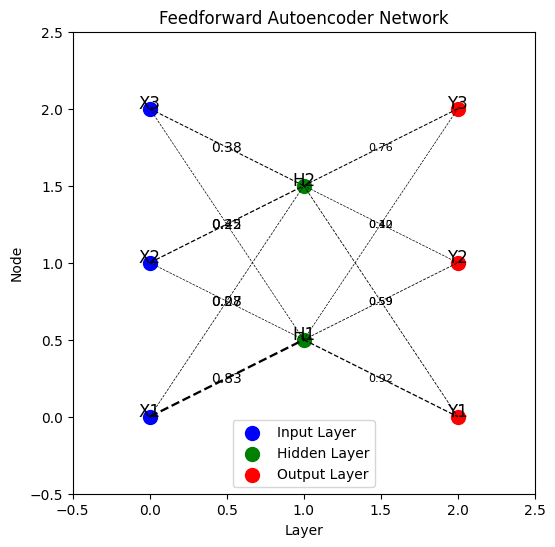

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def draw_autoencoder(weights_input_hidden, weights_hidden_output):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Define positions of nodes
    input_positions = np.array([[0, i] for i in range(3)])
    hidden_positions = np.array([[1, i + 0.5] for i in range(2)])  # Adjust y-position for hidden layer
    output_positions = np.array([[2, i] for i in range(3)])

    # Plot nodes
    ax.scatter(input_positions[:, 0], input_positions[:, 1], s=100, c='blue', label='Input Layer')
    ax.scatter(hidden_positions[:, 0], hidden_positions[:, 1], s=100, c='green', label='Hidden Layer')
    ax.scatter(output_positions[:, 0], output_positions[:, 1], s=100, c='red', label='Output Layer')

    # Draw connections with weights
    for i, input_pos in enumerate(input_positions):
        for j, hidden_pos in enumerate(hidden_positions):
            weight = weights_input_hidden[i, j]
            ax.plot([input_pos[0], hidden_pos[0]], [input_pos[1], hidden_pos[1]],
                    'k--', lw=max(weight * 2, 0.5))  # Reduce line thickness, ensure min thickness
            ax.text((input_pos[0] + hidden_pos[0]) / 2, (input_pos[1] + hidden_pos[1]) / 2,
                    f'{weight:.2f}', fontsize=10, ha='center', va='center')  # Increase font size

    for j, hidden_pos in enumerate(hidden_positions):
        for k, output_pos in enumerate(output_positions):
            weight = weights_hidden_output[j, k]
            ax.plot([hidden_pos[0], output_pos[0]], [hidden_pos[1], output_pos[1]],
                    'k--', lw=max(weight * 1, 0.5))  # Reduce line thickness, ensure min thickness
            ax.text((hidden_pos[0] + output_pos[0]) / 2, (hidden_pos[1] + output_pos[1]) / 2,
                    f'{weight:.2f}', fontsize=8, ha='center', va='center')  # Increase font size

    # Add labels and legend
    for i in range(3):
        ax.text(input_positions[i, 0], input_positions[i, 1], f'X{i+1}', fontsize=12, ha='center')
    for i in range(2):
        ax.text(hidden_positions[i, 0], hidden_positions[i, 1], f'H{i+1}', fontsize=12, ha='center')
    for i in range(3):
        ax.text(output_positions[i, 0], output_positions[i, 1], f'Y{i+1}', fontsize=12, ha='center')

    ax.legend()
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    ax.set_aspect('equal')
    ax.set_title('Feedforward Autoencoder Network')
    plt.xlabel('Layer')
    plt.ylabel('Node')
    plt.grid(False)
    plt.show()

# Initialize weights
weights_input_hidden = np.random.rand(3, 2)  # 3 input nodes to 2 hidden nodes
weights_hidden_output = np.random.rand(2, 3)  # 2 hidden nodes to 3 output nodes

# Draw the network
draw_autoencoder(weights_input_hidden, weights_hidden_output)


**Define the Loss Function**

The loss function is defined as the Mean Squared Error (MSE) between the input $ \mathbf{x} $ and the reconstructed output $ \hat{\mathbf{x}} $:

$$
\mathcal{L}_{\text{MSE}} = \frac{1}{M} \sum_{i=1}^{M} \|\mathbf{x}_i - \hat{\mathbf{x}}_i\|^2,
$$

where $ M $ is the number of training samples.

For a single training example $ i $:

$$
\mathcal{L}_{\text{MSE}}^{(i)} = \frac{1}{2} \sum_{j=1}^{3} (x_{i,j} - \hat{x}_{i,j})^2.
$$

**Compute the Derivatives**

To find the optimum weights, we'll calculate the gradient of the loss function with respect to the weights in both the encoding and decoding layers.

**Derivatives with respect to Decoding Weights $ W_d $**

Let’s start by computing the partial derivative of $ \mathcal{L}_{\text{MSE}} $ with respect to a weight $ w_{jk}' $ in the decoding layer:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}}{\partial w_{jk}'} = \frac{1}{M} \sum_{i=1}^{M} \frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial w_{jk}'}.
$$

Since:

$$
\mathcal{L}_{\text{MSE}}^{(i)} = \frac{1}{2} \sum_{j=1}^{3} (x_{i,j} - \hat{x}_{i,j})^2,
$$

we need:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial w_{jk}'} = \sum_{j=1}^{3} (x_{i,j} - \hat{x}_{i,j}) \cdot \frac{\partial \hat{x}_{i,j}}{\partial w_{jk}'}.
$$

The partial derivative of $ \hat{x}_{i,j} $ with respect to $ w_{jk}' $ involves the sigmoid function:

$$
\frac{\partial \hat{x}_{i,j}}{\partial w_{jk}'} = \frac{\partial \sigma\left( \sum_{k=1}^{2} w_{jk}' z_{i,k} + b_j' \right)}{\partial w_{jk}'}.
$$

Using the chain rule:

$$
\frac{\partial \hat{x}_{i,j}}{\partial w_{jk}'} = \sigma'(a_{i,j}') \cdot z_{i,k},
$$

where $ a_{i,j}' = \sum_{k=1}^{2} w_{jk}' z_{i,k} + b_j' $ and $ \sigma'(a_{i,j}') = \hat{x}_{i,j}(1 - \hat{x}_{i,j}) $.

So:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial w_{jk}'} = -\sum_{j=1}^{3} (x_{i,j} - \hat{x}_{i,j}) \cdot \hat{x}_{i,j}(1 - \hat{x}_{i,j}) \cdot z_{i,k}.
$$

**Derivatives with respect to Encoding Weights $ W_e $**

Next, we calculate the partial derivative of $ \mathcal{L}_{\text{MSE}} $ with respect to a weight $ w_{mn} $ in the encoding layer. This is more complex due to the dependency on $ \mathbf{z} $, which is used in the decoding step.

Start with:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}}{\partial w_{mn}} = \frac{1}{M} \sum_{i=1}^{M} \frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial w_{mn}}.
$$

Apply the chain rule:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial w_{mn}} = \sum_{j=1}^{3} \frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial \hat{x}_{i,j}} \cdot \frac{\partial \hat{x}_{i,j}}{\partial z_{i,m}} \cdot \frac{\partial z_{i,m}}{\partial w_{mn}}.
$$

Using:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial \hat{x}_{i,j}} = -(x_{i,j} - \hat{x}_{i,j}),
$$

and:

$$
\frac{\partial \hat{x}_{i,j}}{\partial z_{i,m}} = \sum_{k=1}^{3} w_{jk}' \cdot \hat{x}_{i,j}(1 - \hat{x}_{i,j}),
$$

the derivative of $ z_{i,m} $ with respect to $ w_{mn} $ is:

$$
\frac{\partial z_{i,m}}{\partial w_{mn}} = \sigma'(a_{i,m}) \cdot x_{i,n

},
$$

where $ a_{i,m} = \sum_{n=1}^{3} w_{mn} x_{i,n} + b_m $ and $ \sigma'(a_{i,m}) = z_{i,m}(1 - z_{i,m}) $.

So:

$$
\frac{\partial \mathcal{L}_{\text{MSE}}^{(i)}}{\partial w_{mn}} = -\sum_{j=1}^{3} (x_{i,j} - \hat{x}_{i,j}) \cdot \sum_{k=1}^{3} w_{jk}' \cdot \hat{x}_{i,j}(1 - \hat{x}_{i,j}) \cdot z_{i,m}(1 - z_{i,m}) \cdot x_{i,n}.
$$

***Gradient Descent***

Using the derived gradients, you can perform gradient descent to optimize the weights $ W_e $, $ W_d $, $ \mathbf{b}_e $, and $ \mathbf{b}_d $ by updating them iteratively as follows:

$$
W_e \leftarrow W_e - \eta \frac{\partial \mathcal{L}_{\text{MSE}}}{\partial W_e}, \quad W_d \leftarrow W_d - \eta \frac{\partial \mathcal{L}_{\text{MSE}}}{\partial W_d},
$$

where $ \eta $ is the learning rate.

This iterative process will help find the optimum weights that minimize the MSE loss.

#### Example AE : Ellipse dataset with sigmoid AF

The autoencoder isn't working well.

Epoch 0, Loss: 4.748893752661329
Epoch 1000, Loss: 4.341809027893352
Epoch 2000, Loss: 4.115050082820742
Epoch 3000, Loss: 3.9530565714692676
Epoch 4000, Loss: 3.8477933534780435
Epoch 5000, Loss: 3.772675521668033
Epoch 6000, Loss: 3.693230782434496
Epoch 7000, Loss: 3.579149430152475
Epoch 8000, Loss: 3.4457780603760892
Epoch 9000, Loss: 3.3440150945964113
Epoch 10000, Loss: 3.279690401568481
Epoch 11000, Loss: 3.238175265976958
Epoch 12000, Loss: 3.2095569880008306
Epoch 13000, Loss: 3.1886725562577896
Epoch 14000, Loss: 3.1727567054487165
Epoch 15000, Loss: 3.1602201843306315
Epoch 16000, Loss: 3.1500882027329995
Epoch 17000, Loss: 3.141729716847396
Epoch 18000, Loss: 3.1347177428323474
Epoch 19000, Loss: 3.1287526526618694


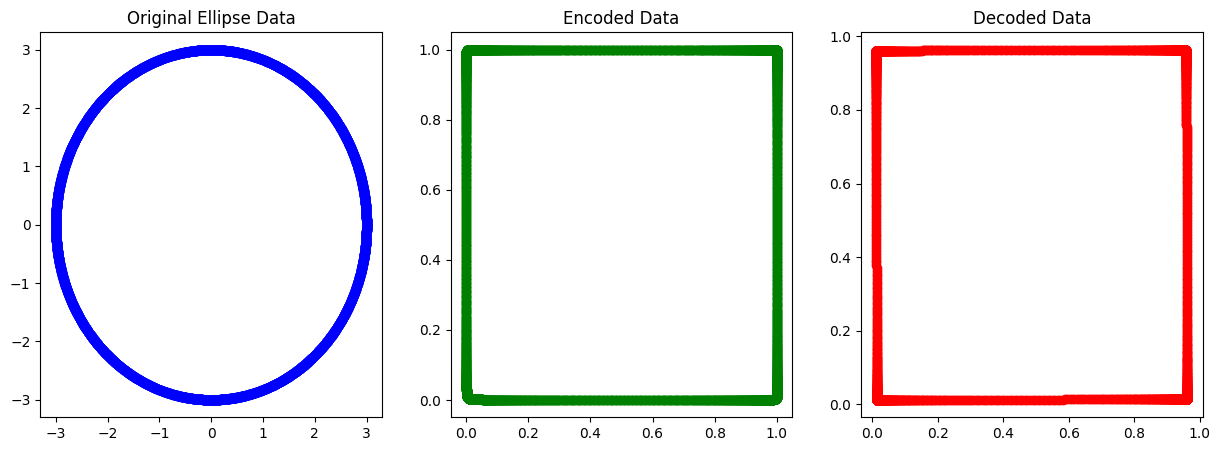

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic ellipse-shaped dataset
def generate_ellipse_data(M, a, b):
    angles = np.linspace(0, 2 * np.pi, M)
    x_data = np.zeros((M, 2))
    x_data[:, 0] = a * np.cos(angles)  # x = a * cos(theta)
    x_data[:, 1] = b * np.sin(angles)  # y = b * sin(theta)
    return x_data

M = 3000  # Number of samples
a, b = 3, 3  # Semi-major and semi-minor axes of the ellipse
x_data = generate_ellipse_data(M, a, b)

# Step 2: Initialize Parameters
input_dim = 2
hidden_dim = 2
output_dim = 2

# Initialize weights and biases for encoder (W_e, b_e) and decoder (W_d, b_d)
W_e = np.random.randn(input_dim, hidden_dim) * 0.01
b_e = np.zeros((1, hidden_dim))
W_d = np.random.randn(hidden_dim, output_dim) * 0.01
b_d = np.zeros((1, output_dim))

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 3: Forward Pass
def forward_pass(x, W_e, b_e, W_d, b_d):
    # Encoder
    z = sigmoid(np.dot(x, W_e) + b_e)
    
    # Decoder
    x_hat = sigmoid(np.dot(z, W_d) + b_d)
    
    return z, x_hat

# Step 4: Compute Loss
def compute_mse_loss(x, x_hat):
    return np.mean(np.square(x - x_hat))

# Step 5: Backward Pass
def backward_pass(x, z, x_hat, W_d):
    # Calculate the gradient of the loss with respect to the output
    d_loss = 2 * (x_hat - x) / x.shape[0]
    
    # Gradients for the decoder
    d_x_hat = d_loss * sigmoid_derivative(x_hat)
    d_W_d = np.dot(z.T, d_x_hat)
    d_b_d = np.sum(d_x_hat, axis=0, keepdims=True)
    
    # Gradients for the encoder
    d_z = np.dot(d_x_hat, W_d.T) * sigmoid_derivative(z)
    d_W_e = np.dot(x.T, d_z)
    d_b_e = np.sum(d_z, axis=0, keepdims=True)
    
    return d_W_e, d_b_e, d_W_d, d_b_d

# Step 6: Update Weights
def update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate):
    W_e -= learning_rate * d_W_e
    b_e -= learning_rate * d_b_e
    W_d -= learning_rate * d_W_d
    b_d -= learning_rate * d_b_d
    
    return W_e, b_e, W_d, b_d

# Step 7: Training Loop
epochs = 20000
learning_rate = 0.005

# Training loop
for epoch in range(epochs):
    # Forward pass
    z, x_hat = forward_pass(x_data, W_e, b_e, W_d, b_d)
    
    # Compute loss
    loss = compute_mse_loss(x_data, x_hat)
    
    # Backward pass
    d_W_e, d_b_e, d_W_d, d_b_d = backward_pass(x_data, z, x_hat, W_d)
    
    # Update weights
    W_e, b_e, W_d, b_d = update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate)
    
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Step 8: Visualization
plt.figure(figsize=(15, 5))

# Original data (2D)
plt.subplot(1, 3, 1)
plt.scatter(x_data[:, 0], x_data[:, 1], c='blue', label='Original')
plt.title('Original Ellipse Data')

# Encoded data (2D)
plt.subplot(1, 3, 2)
plt.scatter(z[:, 0], z[:, 1], c='green', label='Encoded')
plt.title('Encoded Data')

# Decoded data (2D)
plt.subplot(1, 3, 3)
plt.scatter(x_hat[:, 0], x_hat[:, 1], c='red', label='Decoded')
plt.title('Decoded Data')

plt.show()


#### Example AE : Ellipse dataset with RELU AF

Problem with mismatching AF and negative data for recovery.


Epoch 0, Loss: 4.499754268988179
Epoch 1000, Loss: 4.499993785287071
Epoch 2000, Loss: 4.499986048268678
Epoch 3000, Loss: 2.653328504901554
Epoch 4000, Loss: 2.2545405819444997
Epoch 5000, Loss: 2.2175216023302924
Epoch 6000, Loss: 2.209225350861131
Epoch 7000, Loss: 2.205853064223806
Epoch 8000, Loss: 2.2040865812047707
Epoch 9000, Loss: 2.2029080646285015
Epoch 10000, Loss: 2.2019588650491397
Epoch 11000, Loss: 2.2011152154221656
Epoch 12000, Loss: 2.2003370449250452
Epoch 13000, Loss: 2.199609757518492
Epoch 14000, Loss: 2.1989272753584532
Epoch 15000, Loss: 2.1982858099603164
Epoch 16000, Loss: 2.197680896714541
Epoch 17000, Loss: 2.197108819653527
Epoch 18000, Loss: 2.1965664939926848
Epoch 19000, Loss: 2.1960503758560272


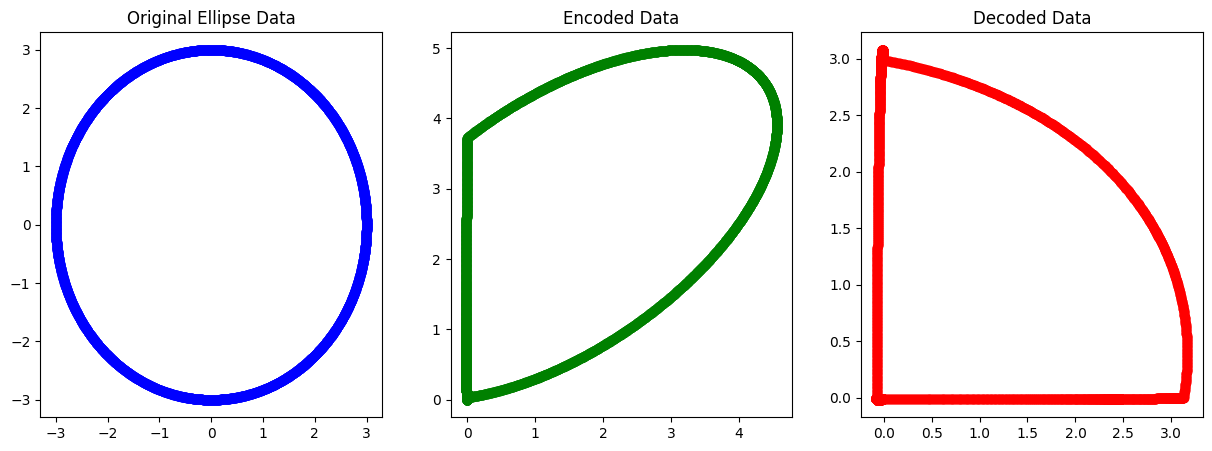

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Generate a synthetic ellipse-shaped dataset
def generate_ellipse_data(M, a, b):
    angles = np.linspace(0, 2 * np.pi, M)
    x_data = np.zeros((M, 2))
    x_data[:, 0] = a * np.cos(angles) # x = a * cos(theta)
    x_data[:, 1] = b * np.sin(angles) # y = b * sin(theta)
    return x_data
M = 3000 # Number of samples
a, b = 3, 3 # Semi-major and semi-minor axes of the ellipse
x_data = generate_ellipse_data(M, a, b)
# Step 2: Initialize Parameters
input_dim = 2
hidden_dim = 2
output_dim = 2
# Initialize weights and biases for encoder (W_e, b_e) and decoder (W_d, b_d)
W_e = np.random.randn(input_dim, hidden_dim) * 0.01
b_e = np.zeros((1, hidden_dim))
W_d = np.random.randn(hidden_dim, output_dim) * 0.01
b_d = np.zeros((1, output_dim))
# Leaky ReLU activation function and its derivative
alpha = 0.01
def leaky_relu(x):
    return np.where(x > 0, x, alpha * x)
def leaky_relu_derivative(x):
    return np.where(x > 0, 1, alpha)
# Step 3: Forward Pass
def forward_pass(x, W_e, b_e, W_d, b_d):
# Encoder
    z = leaky_relu(np.dot(x, W_e) + b_e)
# Decoder
    x_hat = leaky_relu(np.dot(z, W_d) + b_d)
    return z, x_hat

# Step 4: Compute Loss
def compute_mse_loss(x, x_hat):
    return np.mean(np.square(x - x_hat))
# Step 5: Backward Pass
def backward_pass(x, z, x_hat, W_d):
    # Calculate the gradient of the loss with respect to the output
    d_loss = 2 * (x_hat - x) / x.shape[0]
    # Gradients for the decoder
    d_x_hat = d_loss * leaky_relu_derivative(x_hat)
    d_W_d = np.dot(z.T, d_x_hat)
    d_b_d = np.sum(d_x_hat, axis=0, keepdims=True)
    # Gradients for the encoder
    d_z = np.dot(d_x_hat, W_d.T) * leaky_relu_derivative(z)
    d_W_e = np.dot(x.T, d_z)
    d_b_e = np.sum(d_z, axis=0, keepdims=True)
    return d_W_e, d_b_e, d_W_d, d_b_d
# Step 6: Update Weights
def update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate):
    W_e -= learning_rate * d_W_e
    b_e -= learning_rate * d_b_e
    W_d -= learning_rate * d_W_d
    b_d -= learning_rate * d_b_d
    return W_e, b_e, W_d, b_d
# Step 7: Training Loop
epochs = 20000
learning_rate = 0.005
# Training loop
for epoch in range(epochs):
# Forward pass
    z, x_hat = forward_pass(x_data, W_e, b_e, W_d, b_d)
    # Compute loss
    loss = compute_mse_loss(x_data, x_hat)
    # Backward pass
    d_W_e, d_b_e, d_W_d, d_b_d = backward_pass(x_data, z, x_hat, W_d)
    # Update weights
    W_e, b_e, W_d, b_d = update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate)
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
# Step 8: Visualization
plt.figure(figsize=(15, 5))
# Original data (2D)
plt.subplot(1, 3, 1)
plt.scatter(x_data[:, 0], x_data[:, 1], c='blue', label='Original')
plt.title('Original Ellipse Data')
# Encoded data (2D)
plt.subplot(1, 3, 2)
plt.scatter(z[:, 0], z[:, 1], c='green', label='Encoded')
plt.title('Encoded Data')
# Decoded data (2D)
plt.subplot(1, 3, 3)
plt.scatter(x_hat[:, 0], x_hat[:, 1], c='red', label='Decoded')
plt.title('Decoded Data')
plt.show()

#### Example AE : Ellipse dataset with RELU AF with Biasing data

Epoch 0, Loss: 29.49941201881798
Epoch 1000, Loss: 2.2566424659306423
Epoch 2000, Loss: 2.2518089700498676
Epoch 3000, Loss: 2.2504704292750013
Epoch 4000, Loss: 2.2501143727819755
Epoch 5000, Loss: 2.25002120188349
Epoch 6000, Loss: 0.000580299663714989
Epoch 7000, Loss: 0.00014879959594686209
Epoch 8000, Loss: 4.1899492575914796e-05
Epoch 9000, Loss: 1.225127580580911e-05
Epoch 10000, Loss: 3.6855061058016317e-06
Epoch 11000, Loss: 1.1323733737986214e-06
Epoch 12000, Loss: 3.5366276636734785e-07
Epoch 13000, Loss: 1.1205068691484705e-07
Epoch 14000, Loss: 3.6041915985517185e-08
Epoch 15000, Loss: 1.1823218287497962e-08
Epoch 16000, Loss: 3.992076743616199e-09
Epoch 17000, Loss: 1.4088642495049594e-09
Epoch 18000, Loss: 5.316011810698347e-10
Epoch 19000, Loss: 2.2027373758305869e-10
Epoch 20000, Loss: 1.0221367661803239e-10
Epoch 21000, Loss: 5.326972625537228e-11
Epoch 22000, Loss: 3.07996851231567e-11
Epoch 23000, Loss: 1.9284238403450808e-11
Epoch 24000, Loss: 1.2726396995461276e-1

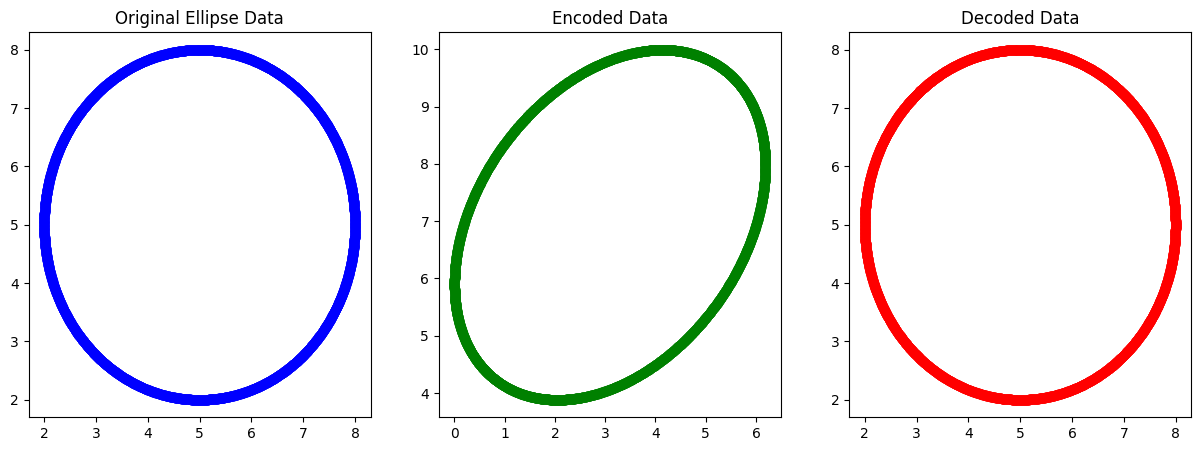

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic ellipse-shaped dataset
def generate_ellipse_data(M, a, b, bias):
    angles = np.linspace(0, 2 * np.pi, M)
    x_data = np.zeros((M, 2))
    x_data[:, 0] = a * np.cos(angles) + bias  # x = a * cos(theta) + bias
    x_data[:, 1] = b * np.sin(angles) + bias  # y = b * sin(theta) + bias
    return x_data

M = 3000  # Number of samples
a, b = 3, 3  # Semi-major and semi-minor axes of the ellipse
bias = 5    # Bias to shift data points to positive quadrant
x_data = generate_ellipse_data(M, a, b, bias)

# Step 2: Initialize Parameters
input_dim = 2
hidden_dim = 2
output_dim = 2

# Initialize weights and biases for encoder (W_e, b_e) and decoder (W_d, b_d)
W_e = np.random.randn(input_dim, hidden_dim) * 0.01
b_e = np.zeros((1, hidden_dim))
W_d = np.random.randn(hidden_dim, output_dim) * 0.01
b_d = np.zeros((1, output_dim))

# Leaky ReLU activation function and its derivative
alpha = 0.01

def leaky_relu(x):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x):
    return np.where(x > 0, 1, alpha)

# Step 3: Forward Pass
def forward_pass(x, W_e, b_e, W_d, b_d):
    # Encoder
    z = leaky_relu(np.dot(x, W_e) + b_e)
    
    # Decoder
    x_hat = leaky_relu(np.dot(z, W_d) + b_d)
    
    return z, x_hat

# Step 4: Compute Loss
def compute_mse_loss(x, x_hat):
    return np.mean(np.square(x - x_hat))

# Step 5: Backward Pass
def backward_pass(x, z, x_hat, W_d):
    # Calculate the gradient of the loss with respect to the output
    d_loss = 2 * (x_hat - x) / x.shape[0]
    
    # Gradients for the decoder
    d_x_hat = d_loss * leaky_relu_derivative(x_hat)
    d_W_d = np.dot(z.T, d_x_hat)
    d_b_d = np.sum(d_x_hat, axis=0, keepdims=True)
    
    # Gradients for the encoder
    d_z = np.dot(d_x_hat, W_d.T) * leaky_relu_derivative(z)
    d_W_e = np.dot(x.T, d_z)
    d_b_e = np.sum(d_z, axis=0, keepdims=True)
    
    return d_W_e, d_b_e, d_W_d, d_b_d

# Step 6: Update Weights
def update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate):
    W_e -= learning_rate * d_W_e
    b_e -= learning_rate * d_b_e
    W_d -= learning_rate * d_W_d
    b_d -= learning_rate * d_b_d
    
    return W_e, b_e, W_d, b_d

# Step 7: Training Loop
epochs = 25000
learning_rate = 0.002

# Training loop
for epoch in range(epochs):
    # Forward pass
    z, x_hat = forward_pass(x_data, W_e, b_e, W_d, b_d)
    
    # Compute loss
    loss = compute_mse_loss(x_data, x_hat)
    
    # Backward pass
    d_W_e, d_b_e, d_W_d, d_b_d = backward_pass(x_data, z, x_hat, W_d)
    
    # Update weights
    W_e, b_e, W_d, b_d = update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate)
    
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Step 8: Visualization
plt.figure(figsize=(15, 5))

# Original data (2D)
plt.subplot(1, 3, 1)
plt.scatter(x_data[:, 0], x_data[:, 1], c='blue', label='Original')
plt.title('Original Ellipse Data')

# Encoded data (2D)
plt.subplot(1, 3, 2)
plt.scatter(z[:, 0], z[:, 1], c='green', label='Encoded')
plt.title('Encoded Data')

# Decoded data (2D)
plt.subplot(1, 3, 3)
plt.scatter(x_hat[:, 0], x_hat[:, 1], c='red', label='Decoded')
plt.title('Decoded Data')

plt.show()


#### Example AE : Regulated Sigmoid for hidden and RELU for output

Epoch 0, Loss: 20.252265033373288
Epoch 1000, Loss: 2.840976348160917
Epoch 2000, Loss: 0.11302243902716794
Epoch 3000, Loss: 0.01273963803882825
Epoch 4000, Loss: 0.010501905251744159
Epoch 5000, Loss: 0.009174833832633712
Epoch 6000, Loss: 0.008199820269915533
Epoch 7000, Loss: 0.007724960287272952
Epoch 8000, Loss: 0.007615318199105559
Epoch 9000, Loss: 0.007710862445879562
Epoch 10000, Loss: 0.007886537922729548
Epoch 11000, Loss: 0.008060981853574484
Epoch 12000, Loss: 0.008189929939366477
Epoch 13000, Loss: 0.008255497141464126
Epoch 14000, Loss: 0.008256180657243773
Epoch 15000, Loss: 0.008199297034555833
Epoch 16000, Loss: 0.008095942844869851
Epoch 17000, Loss: 0.007957958846096782
Epoch 18000, Loss: 0.00779629043372439
Epoch 19000, Loss: 0.0076202425251320465


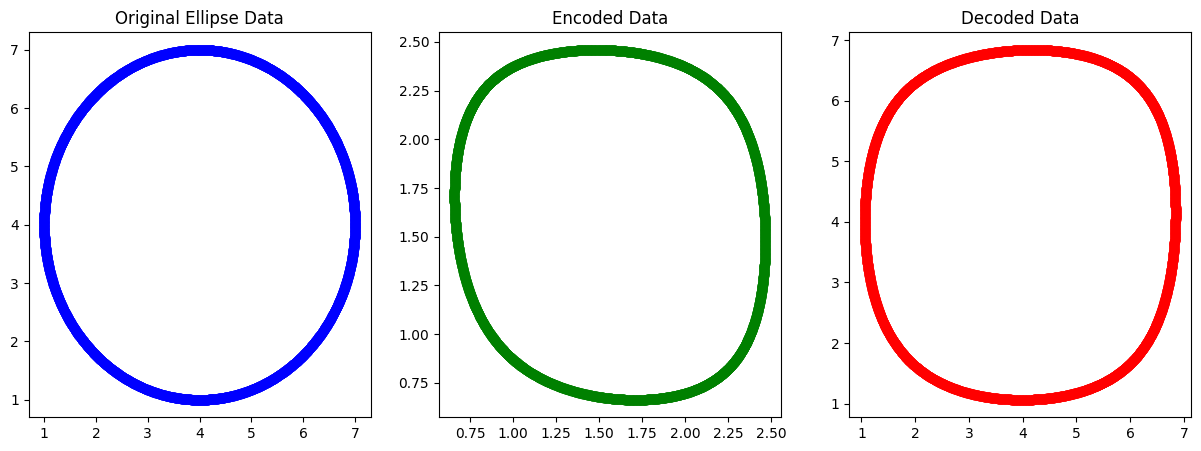

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic ellipse-shaped dataset
def generate_ellipse_data(M, a, b, bias):
    angles = np.linspace(0, 2 * np.pi, M)
    x_data = np.zeros((M, 2))
    x_data[:, 0] = a * np.cos(angles) + bias  # x = a * cos(theta) + bias
    x_data[:, 1] = b * np.sin(angles) + bias  # y = b * sin(theta) + bias
    return x_data

M = 3000  # Number of samples
a, b = 3, 3  # Semi-major and semi-minor axes of the ellipse
bias = 4    # Bias to shift data points to positive quadrant
x_data = generate_ellipse_data(M, a, b, bias)

# Step 2: Initialize Parameters
input_dim = 2
hidden_dim = 2
output_dim = 2

# Initialize weights and biases for encoder (W_e, b_e) and decoder (W_d, b_d)
W_e = np.random.randn(input_dim, hidden_dim) * 0.01
b_e = np.zeros((1, hidden_dim))
W_d = np.random.randn(hidden_dim, output_dim) * 0.01
b_d = np.zeros((1, output_dim))

# Sigmoid and ReLU activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Step 3: Forward Pass
def forward_pass(x, W_e, b_e, W_d, b_d):
    # Encoder
    z =3* sigmoid(0.1*np.dot(x, W_e) + b_e)
    
    # Decoder
    x_hat = relu(np.dot(z, W_d) + b_d)
    
    return z, x_hat

# Step 4: Compute Loss
def compute_mse_loss(x, x_hat):
    return np.mean(np.square(x - x_hat))

# Step 5: Backward Pass
def backward_pass(x, z, x_hat, W_d):
    # Calculate the gradient of the loss with respect to the output
    d_loss = 2 * (x_hat - x) / x.shape[0]
    
    # Gradients for the decoder
    d_x_hat = d_loss * relu_derivative(x_hat)
    d_W_d = np.dot(z.T, d_x_hat)
    d_b_d = np.sum(d_x_hat, axis=0, keepdims=True)
    
    # Gradients for the encoder
    d_z = np.dot(d_x_hat, W_d.T) * sigmoid_derivative(z)
    d_W_e = np.dot(x.T, d_z)
    d_b_e = np.sum(d_z, axis=0, keepdims=True)
    
    return d_W_e, d_b_e, d_W_d, d_b_d

# Step 6: Update Weights
def update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate):
    W_e -= learning_rate * d_W_e
    b_e -= learning_rate * d_b_e
    W_d -= learning_rate * d_W_d
    b_d -= learning_rate * d_b_d
    
    return W_e, b_e, W_d, b_d

# Step 7: Training Loop
epochs = 20000
learning_rate = 0.005

# Training loop
for epoch in range(epochs):
    # Forward pass
    z, x_hat = forward_pass(x_data, W_e, b_e, W_d, b_d)
    
    # Compute loss
    loss = compute_mse_loss(x_data, x_hat)
    
    # Backward pass
    d_W_e, d_b_e, d_W_d, d_b_d = backward_pass(x_data, z, x_hat, W_d)
    
    # Update weights
    W_e, b_e, W_d, b_d = update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate)
    
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Step 8: Visualization
plt.figure(figsize=(15, 5))

# Original data (2D)
plt.subplot(1, 3, 1)
plt.scatter(x_data[:, 0], x_data[:, 1], c='blue', label='Original')
plt.title('Original Ellipse Data')

# Encoded data (2D)
plt.subplot(1, 3, 2)
plt.scatter(z[:, 0], z[:, 1], c='green', label='Encoded')
plt.title('Encoded Data')

# Decoded data (2D)
plt.subplot(1, 3, 3)
plt.scatter(x_hat[:, 0], x_hat[:, 1], c='red', label='Decoded')
plt.title('Decoded Data')

plt.show()


#### Conclusion

Understanding the impact of activation functions and matching them with the dataset can significantly influence the performance of neural networks, including autoencoders. 

**Matching Activation Functions with Datasets:** 

Choose activation functions based on dataset characteristics; for data in a specific range like 0-1, sigmoid is suitable, while ReLU or its variants are better for broader ranges. For reconstruction tasks, align output activations with the data distribution, and use sigmoid for binary classification, ReLU or linear functions for regression. 

**Understanding Data Exceptions:** 

Account for bias shifts and normalization in data by choosing activation functions that complement these transformations. Address overfitting with regularization and underfitting by adjusting model complexity and activation functions.

Epoch 0, Loss: 104.46953078746617
Epoch 1000, Loss: 2.2527683354006762
Epoch 2000, Loss: 2.252203762479861
Epoch 3000, Loss: 2.251801339063604
Epoch 4000, Loss: 2.251513832863968
Epoch 5000, Loss: 2.251307281015377
Epoch 6000, Loss: 2.219941603358059
Epoch 7000, Loss: 0.0002657280160549213
Epoch 8000, Loss: 0.00018718653299095678
Epoch 9000, Loss: 0.00013350008686126584
Epoch 10000, Loss: 9.542292842007974e-05
Epoch 11000, Loss: 6.823646728911043e-05
Epoch 12000, Loss: 4.880544660796574e-05
Epoch 13000, Loss: 3.4913997144378694e-05
Epoch 14000, Loss: 2.4981147675858338e-05
Epoch 15000, Loss: 1.787783706902638e-05
Epoch 16000, Loss: 1.2797337125210799e-05
Epoch 17000, Loss: 9.163087070224503e-06
Epoch 18000, Loss: 6.562972873748675e-06
Epoch 19000, Loss: 4.702418398114842e-06
Epoch 20000, Loss: 3.3709005888988313e-06
Epoch 21000, Loss: 2.4174956835894043e-06
Epoch 22000, Loss: 1.7346519868753245e-06
Epoch 23000, Loss: 1.2454563569695877e-06
Epoch 24000, Loss: 8.948935362657074e-07


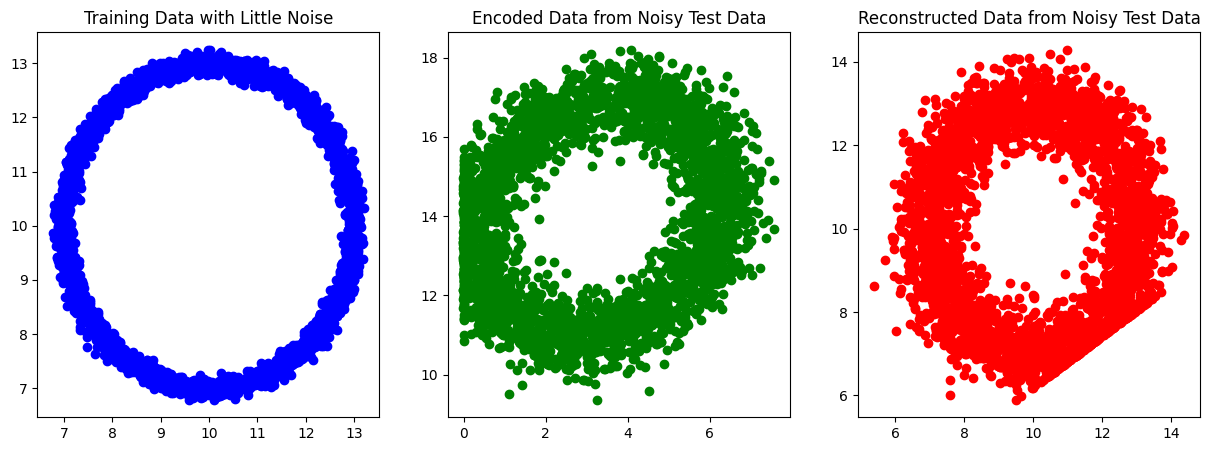

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic ellipse-shaped dataset
def generate_ellipse_data(M, a, b, bias, noise_factor):
    angles = np.linspace(0, 2 * np.pi, M)
    x_data = np.zeros((M, 2))
    x_data[:, 0] = a * np.cos(angles) + bias  # x = a * cos(theta) + bias
    x_data[:, 1] = b * np.sin(angles) + bias  # y = b * sin(theta) + bias
    # Add Gaussian noise
    x_data += noise_factor * np.random.randn(M, 2)
    return x_data

# Parameters
M = 3000  # Number of samples
a, b = 3, 3  # Semi-major and semi-minor axes of the ellipse
bias = 10    # Bias to shift data points to positive quadrant

# Generate training data with little noise
train_noise_factor = 0.1
x_train = generate_ellipse_data(M, a, b, bias, train_noise_factor)

# Generate testing data with more noise
test_noise_factor = 0.5
x_test = generate_ellipse_data(M, a, b, bias, test_noise_factor)

# Step 2: Initialize Parameters
input_dim = 2
hidden_dim = 2
output_dim = 2

# Initialize weights and biases for encoder (W_e, b_e) and decoder (W_d, b_d)
W_e = np.random.randn(input_dim, hidden_dim) * 0.01
b_e = np.zeros((1, hidden_dim))
W_d = np.random.randn(hidden_dim, output_dim) * 0.01
b_d = np.zeros((1, output_dim))

# Leaky ReLU activation function and its derivative
alpha = 0.01

def leaky_relu(x):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x):
    return np.where(x > 0, 1, alpha)

# Step 3: Forward Pass
def forward_pass(x, W_e, b_e, W_d, b_d):
    # Encoder
    z = leaky_relu(np.dot(x, W_e) + b_e)
    
    # Decoder
    x_hat = leaky_relu(np.dot(z, W_d) + b_d)
    
    return z, x_hat

# Step 4: Compute Loss
def compute_mse_loss(x, x_hat):
    return np.mean(np.square(x - x_hat))

# Step 5: Backward Pass
def backward_pass(x, z, x_hat, W_d):
    # Calculate the gradient of the loss with respect to the output
    d_loss = 2 * (x_hat - x) / x.shape[0]
    
    # Gradients for the decoder
    d_x_hat = d_loss * leaky_relu_derivative(x_hat)
    d_W_d = np.dot(z.T, d_x_hat)
    d_b_d = np.sum(d_x_hat, axis=0, keepdims=True)
    
    # Gradients for the encoder
    d_z = np.dot(d_x_hat, W_d.T) * leaky_relu_derivative(z)
    d_W_e = np.dot(x.T, d_z)
    d_b_e = np.sum(d_z, axis=0, keepdims=True)
    
    return d_W_e, d_b_e, d_W_d, d_b_d

# Step 6: Update Weights
def update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate):
    W_e -= learning_rate * d_W_e
    b_e -= learning_rate * d_b_e
    W_d -= learning_rate * d_W_d
    b_d -= learning_rate * d_b_d
    
    return W_e, b_e, W_d, b_d

# Step 7: Training Loop
epochs = 25000
learning_rate = 0.002

# Training loop
for epoch in range(epochs):
    # Forward pass
    z, x_hat = forward_pass(x_train, W_e, b_e, W_d, b_d)
    
    # Compute loss
    loss = compute_mse_loss(x_train, x_hat)
    
    # Backward pass
    d_W_e, d_b_e, d_W_d, d_b_d = backward_pass(x_train, z, x_hat, W_d)
    
    # Update weights
    W_e, b_e, W_d, b_d = update_weights(W_e, b_e, W_d, b_d, d_W_e, d_b_e, d_W_d, d_b_d, learning_rate)
    
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Step 8: Test with noisy data
z_test, x_hat_test = forward_pass(x_test, W_e, b_e, W_d, b_d)

# Step 9: Visualization
plt.figure(figsize=(15, 5))

# Noisy training data (2D)
plt.subplot(1, 3, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c='blue', label='Training Data (Noisy)')
plt.title('Training Data with Little Noise')

# Encoded testing data (2D)
plt.subplot(1, 3, 2)
plt.scatter(z_test[:, 0], z_test[:, 1], c='green', label='Encoded Testing Data')
plt.title('Encoded Data from Noisy Test Data')

# Decoded testing data (2D)
plt.subplot(1, 3, 3)
plt.scatter(x_hat_test[:, 0], x_hat_test[:, 1], c='red', label='Reconstructed Testing Data')
plt.title('Reconstructed Data from Noisy Test Data')

plt.show()


## Homework: Extend the Previous Work with a 3D Sphere

**Objective:** Continue from the previous exercise, now applying the concepts to a 3-dimensional sphere.

**Tasks:**

**Data Generation:**
   - Generate a 3D sphere dataset.
   - Ensure the data has 3 dimensions for both input and output, with a 2-dimensional hidden layer.

**Denoising Application:**
   - Apply the autoencoder to denoise the 3D sphere data.
   - Add noise to the input data and train the autoencoder to reconstruct the original, noise-free data.

**Parameter Tuning:**
   - Experiment with different parameters such as learning rate, number of epochs, and noise levels.
   - Observe how these changes affect the performance of the autoencoder in terms of reconstruction quality.

**Discussion on Fundamentals:**
   - Discuss the role and significance of the hidden layer in the autoencoder.
   - Explore how the 2-dimensional hidden layer encodes the 3-dimensional input and what it represents.

## Miniproject complete AE with Binary Cross-Entropy (BCE)

- Text and mathematics
- Example 

---




### **Convolutional Autoencoders**: 

Use convolutional layers instead of fully connected layers, making them well-suited for image data. They can capture spatial hierarchies and local patterns.

#### Convolutional Autoencoders (CAE)
Convolutional Autoencoders (CAE) are a type of autoencoder where the encoder and decoder are made using convolutional layers, making them particularly suited for image data. They are powerful tools for tasks like image denoising, image compression, and feature extraction.

#### Structure of a Convolutional Autoencoder
A typical Convolutional Autoencoder consists of two parts:

Encoder: Compresses the input image into a lower-dimensional latent space. This is achieved using convolutional and pooling layers.
Decoder: Reconstructs the image from the latent space back to the original dimensions. This is done using upsampling and convolutional layers.

***Example Noisy Images***

Explanation:
Dataset: MNIST is used, which consists of 28x28 grayscale images of handwritten digits. The images are normalized to [0, 1] and reshaped to include a channel dimension.
Encoder:
Conv2D: Applies convolutional filters to detect features like edges, corners, etc.
MaxPooling2D: Reduces the spatial dimensions, creating a compressed representation.
Latent Space: This is the compressed form of the image, typically of much lower dimensionality.
Decoder:
UpSampling2D: Increases the spatial dimensions to reconstruct the image.
Conv2D: Applies convolutional filters to reconstruct the image from the latent space.
Training: The model is trained to minimize the difference between the original and reconstructed images using binary crossentropy loss.



469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 181ms/step - loss: 0.2062 - val_loss: 0.1046
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


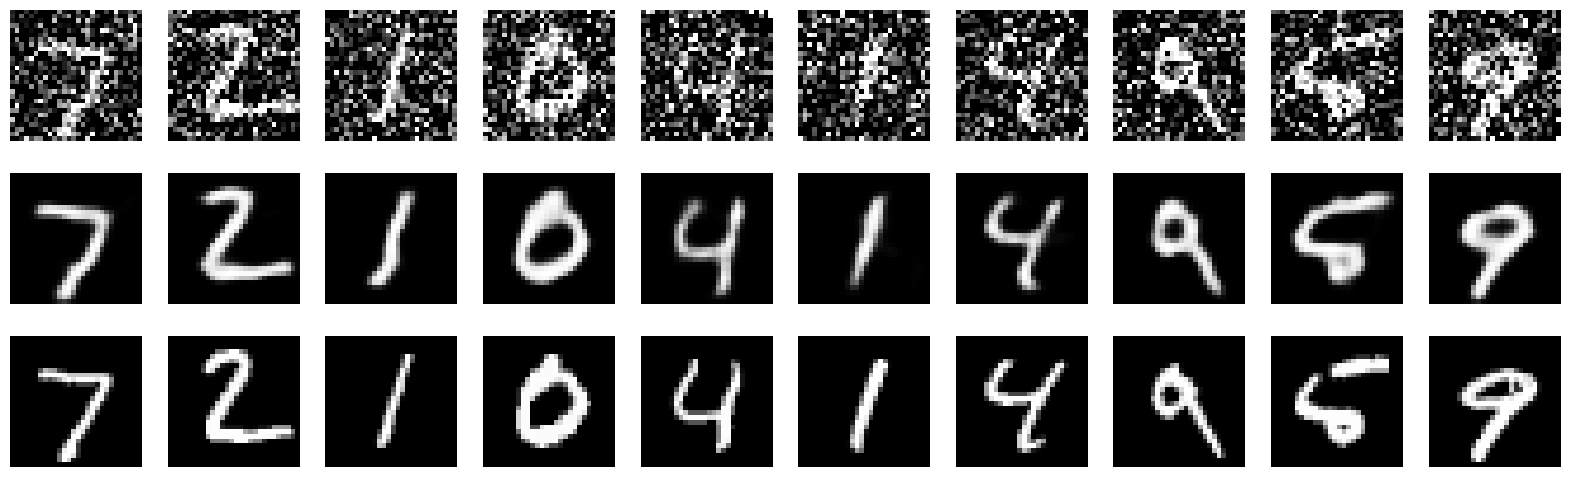

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the MNIST dataset from a local .npz file
mnist_data = np.load('mnist.npz')

# Extract the training and test sets
x_train = mnist_data['x_train']
x_test = mnist_data['x_test']

# Normalize and reshape the data to fit the model (adding a channel dimension)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

input_shape = x_train.shape[1:]

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Build the Encoder
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Latent space
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Build the Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
epochs = 1
batch_size = 128

autoencoder.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test_noisy, x_test))

# Encode and decode some digits from the test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original noisy and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display original clean image for comparison
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 943,877 (3.60 MB)

 Trainable params: 314,625 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 629,252 (2.40 MB)

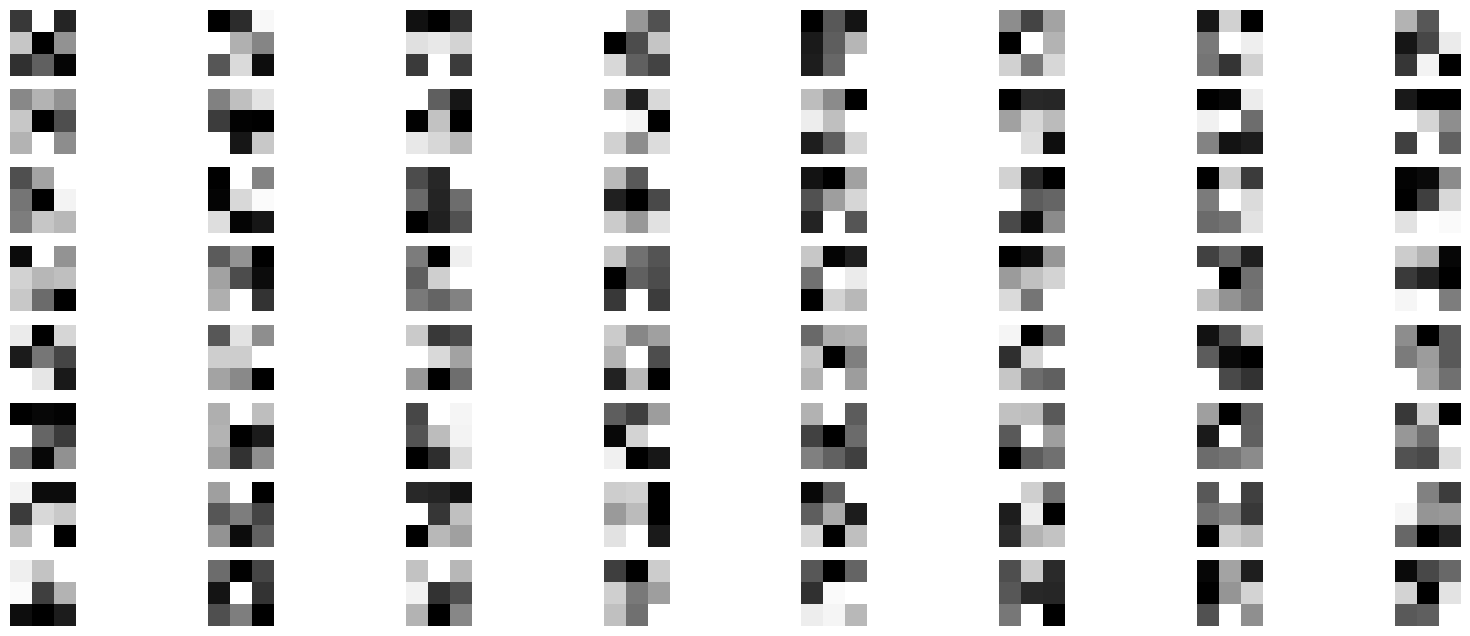

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Print the summary of the autoencoder to identify the correct layer
autoencoder.summary()

# Identify the index or name of the layer you want to visualize
conv_layer = autoencoder.get_layer(index=3)  # Update the index if necessary

# Get the weights of the convolutional layer
weights = conv_layer.get_weights()

# Check if the weights are available
if len(weights) > 0:
    filters, biases = weights
    
    # Normalize filter values between 0 and 1 for visualization
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters = filters.shape[-1]  # Number of filters

    # Plot the filters
    plt.figure(figsize=(20, 8))
    for i in range(n_filters):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')
    plt.show()
else:
    print("The selected layer does not have any trainable weights.")


## Miniproject: Conv AE 

- complete with code
- concept of pooling, upsampling, filter 

## Miniproject 1, 2 , 3: Conv VAE 

**Variational Autoencoders (VAEs)**: Instead of learning a deterministic latent representation, VAEs learn a probabilistic representation. This makes them suitable for generating new data samples.


**Data Generation** : Variational autoencoders can generate new data samples similar to the training data, useful in tasks like image synthesis and data augmentation.

**Feature Learning** : Autoencoders can learn useful features from the data that can be used in other machine learning tasks.